In [ ]:
# 数据基本信息探索与预处理

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:/A GETAJOBDUDE/PROJECTS/archive/CreditCardTransaction.csv",
    dtype={'TranxDate': str})

# 基本信息
df.head(20)

,Year,Month,Department,Division,Merchant,TranxDescription,TranxDate,TrnxAmount
0,2019,1,LEGISLATIVE BRANCH,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,06/29/2018,9.85
1,2019,1,LEGISLATIVE BRANCH,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,07-03-2018,15.00
2,2019,1,LEGISLATIVE BRANCH,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,07-01-2018,170.31
3,2019,1,LEGISLATIVE BRANCH,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,06/30/2018,3427.80
4,2019,1,LEGISLATIVE BRANCH,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,06/27/2018,113.06
5,2019,1,LEGISLATIVE BRANCH,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,06/27/2018,115.15
6,2019,1,LEGISLATIVE BRANCH,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,06/27/2018,159.03
7,2019,1,LEGISLATIVE BRANCH,General Assembly House,QUILL CORPORATION,Stationery-Office Supplies-Printing Writing Pap,07-04-2018,51.70
8,2019,1,LEGISLATIVE BRANCH,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,06/27/2018,167.42
9,2019,1,LEGISLATIVE BRANCH,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,06/27/2018,114.13


In [16]:
# 查看样例确认
print(df['TranxDate'].head(10))

# 清理空格和混合分隔符
df['TranxDate'] = df['TranxDate'].str.strip().str.replace('/', '-', regex=False)

# 转换为日期格式（允许混合）
df['TranxDate'] = pd.to_datetime(df['TranxDate'], format='mixed', errors='coerce')

print(df['TranxDate'].head(10))
print("无法识别的日期数量:", df['TranxDate'].isna().sum())



0    06/29/2018
1    07-03-2018
2    07-01-2018
3    06/30/2018
4    06/27/2018
5    06/27/2018
6    06/27/2018
7    07-04-2018
8    06/27/2018
9    06/27/2018
Name: TranxDate, dtype: object
0   2018-06-29
1   2018-07-03
2   2018-07-01
3   2018-06-30
4   2018-06-27
5   2018-06-27
6   2018-06-27
7   2018-07-04
8   2018-06-27
9   2018-06-27
Name: TranxDate, dtype: datetime64[ns]
无法识别的日期数量: 0


In [18]:
#单变量分析
df.head(100)

,Year,Month,Department,Division,Merchant,TranxDescription,TranxDate,TrnxAmount
0,2019,1,LEGISLATIVE BRANCH,General Assembly House,USPS PO 0917600901,Postal Services-Government Only,2018-06-29,9.85
1,2019,1,LEGISLATIVE BRANCH,General Assembly House,GAN*NEWSPAPER SUB1052,Direct Marketing-Continuity-Subscription Merch...,2018-07-03,15.00
2,2019,1,LEGISLATIVE BRANCH,General Assembly House,DS SERVICES STANDARD COFF,Nondurable Goods Not Elsewhere Classified,2018-07-01,170.31
3,2019,1,LEGISLATIVE BRANCH,General Assembly House,BETHANY BLUES - LEWES,Eating Places Restaurants,2018-06-30,3427.80
4,2019,1,LEGISLATIVE BRANCH,General Assembly House,XEROX CORPORATION/RBO,Office Photographic Photocopy Microfilm Equipmt,2018-06-27,113.06
...,...,...,...,...,...,...,...,...
95,2019,1,JUDICIAL,Superior Court,CAVANAUGHS RESTAURANT,Eating Places Restaurants,2018-07-25,90.20
96,2019,1,JUDICIAL,Superior Court,VZWRLSS*IVR VB,Telecom Incl Prepaid-Recurring Phone Svcs,2018-07-13,120.04
97,2019,1,JUDICIAL,Superior Court,AMAZON MKTPLACE PMTS,Book Stores,2018-07-16,56.98
98,2019,1,JUDICIAL,Superior Court,AMAZON MKTPLACE PMTS,Book Stores,2018-07-17,899.00


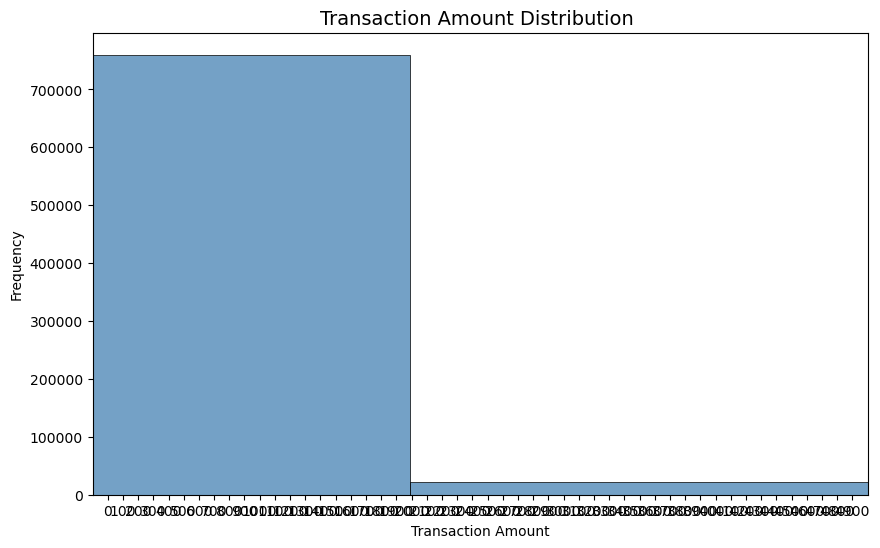

In [35]:
##金额分布
plt.figure(figsize=(10,6))
sns.histplot(df['TrnxAmount'], bins=100, kde=False, color='steelblue')
plt.xlim(-100, 5000)              # 限制显示范围
plt.xticks(range(0, 5000,100)) 
plt.title("Transaction Amount Distribution ", fontsize=14)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

#sns.boxplot(x=df['TrnxAmount'])
#plt.title("Boxplot of Transaction Amount")
#plt.show()

D:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


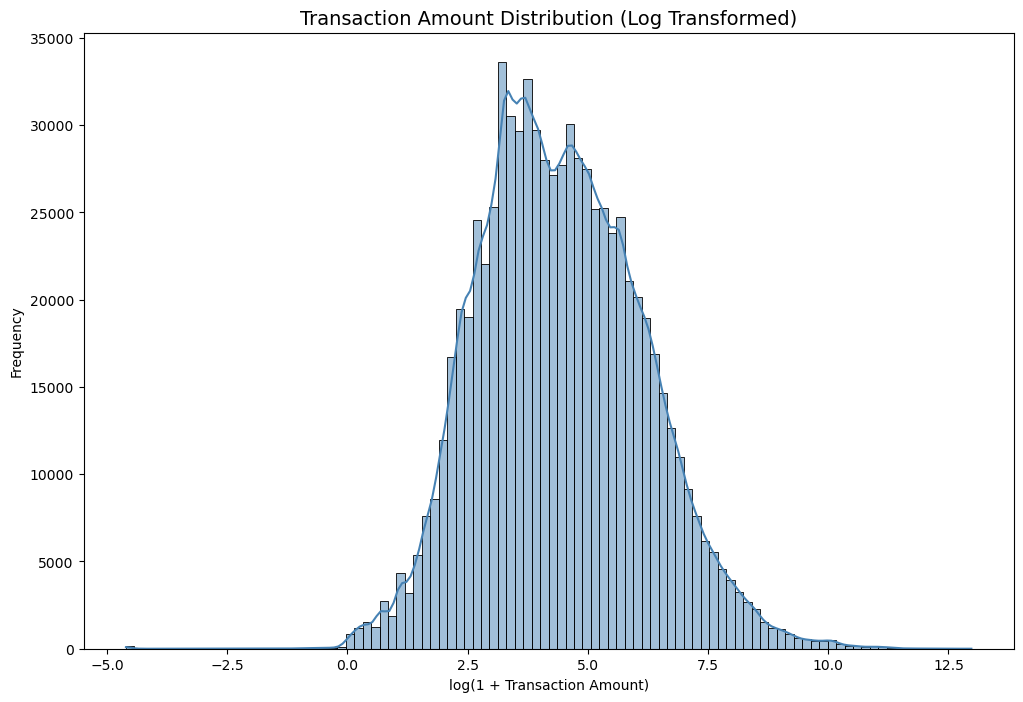

In [47]:
##金额分布高度右偏（skewed），先采用对数变换以及分段分析

df['LogAmount'] = np.log1p(df['TrnxAmount'])  # log(1+x) 可处理0值

plt.figure(figsize=(12,8))
sns.histplot(df['LogAmount'], bins=100, kde=True, color='steelblue')
plt.title("Transaction Amount Distribution (Log Transformed)", fontsize=14)
plt.xlabel("log(1 + Transaction Amount)")
plt.ylabel("Frequency")
plt.show()



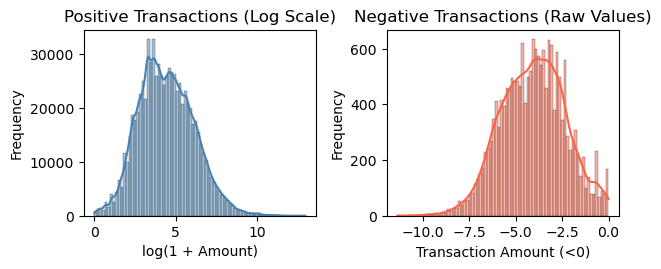

D:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


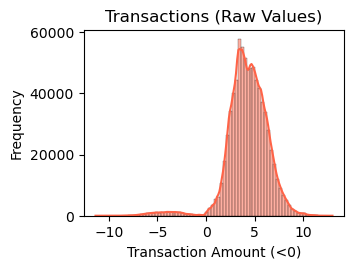

In [55]:


# 子图1：正金额对数分布
plt.subplot(2, 2, 1)
sns.histplot(np.log1p(df.loc[df['TrnxAmount'] >= 0, 'TrnxAmount']),
             bins=80, kde=True, color='steelblue')
plt.title("Positive Transactions (Log Scale)")
plt.xlabel("log(1 + Amount)")
plt.ylabel("Frequency")

# 子图2：负金额分布
plt.subplot(2, 2, 2)
sns.histplot(
    -np.log1p(-df.loc[df['TrnxAmount'] < 0, 'TrnxAmount']),   # 对负数取 -log(1+|x|)
    bins=80, kde=True, color='tomato'
)
plt.title("Negative Transactions (Raw Values)")
plt.xlabel("Transaction Amount (<0)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#子图3：正负合体
plt.subplot(2, 2, 3)

sns.histplot(
    np.where(df['TrnxAmount'] < 0,
             -np.log1p(-df['TrnxAmount']),   # 对负数取 -log(1+|x|)
             np.log1p(df['TrnxAmount'])),    # 对正数取 log(1+x)
    bins=80, kde=True, color='tomato'
)
plt.title("Transactions (Raw Values)")
plt.xlabel("Transaction Amount (<0)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



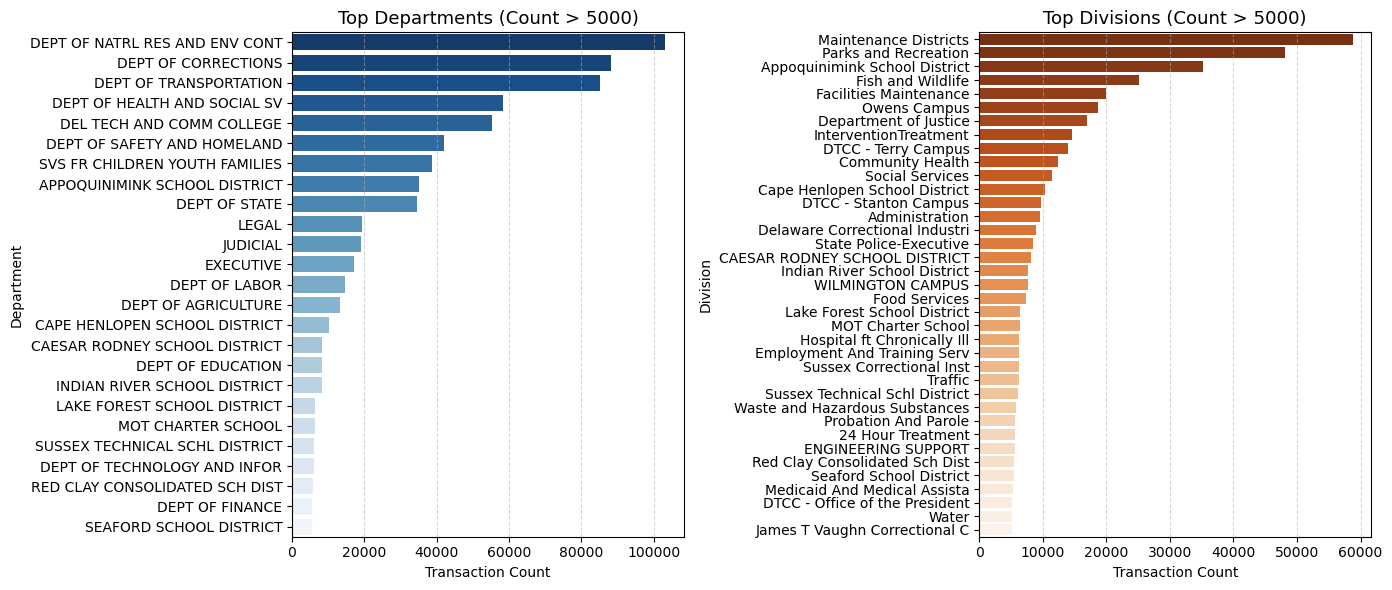

In [58]:
##类别分布


# ---------- 参数设置 ----------
threshold = 5000   # 出现次数下限（可根据数据规模调整）

# ---------- 数据过滤 ----------
dept_counts = df['Department'].value_counts()
div_counts = df['Division'].value_counts()

dept_filtered = dept_counts[dept_counts > threshold].index
div_filtered = div_counts[div_counts > threshold].index

# ---------- 画图 ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(
    y='Department', data=df[df['Department'].isin(dept_filtered)],
    order=dept_counts[dept_filtered].index,
    ax=axes[0], palette='Blues_r'
)
axes[0].set_title("Top Departments (Count > {})".format(threshold), fontsize=13)
axes[0].set_xlabel("Transaction Count")
axes[0].set_ylabel("Department")

sns.countplot(
    y='Division', data=df[df['Division'].isin(div_filtered)],
    order=div_counts[div_filtered].index,
    ax=axes[1], palette='Oranges_r'
)
axes[1].set_title("Top Divisions (Count > {})".format(threshold), fontsize=13)
axes[1].set_xlabel("Transaction Count")
axes[1].set_ylabel("Division")

# ---------- 优化布局 ----------
for ax in axes:
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_xlim(left=0)
    for label in ax.get_yticklabels():
        label.set_fontsize(10)

plt.tight_layout()
plt.show()


In [22]:
#双变量分布

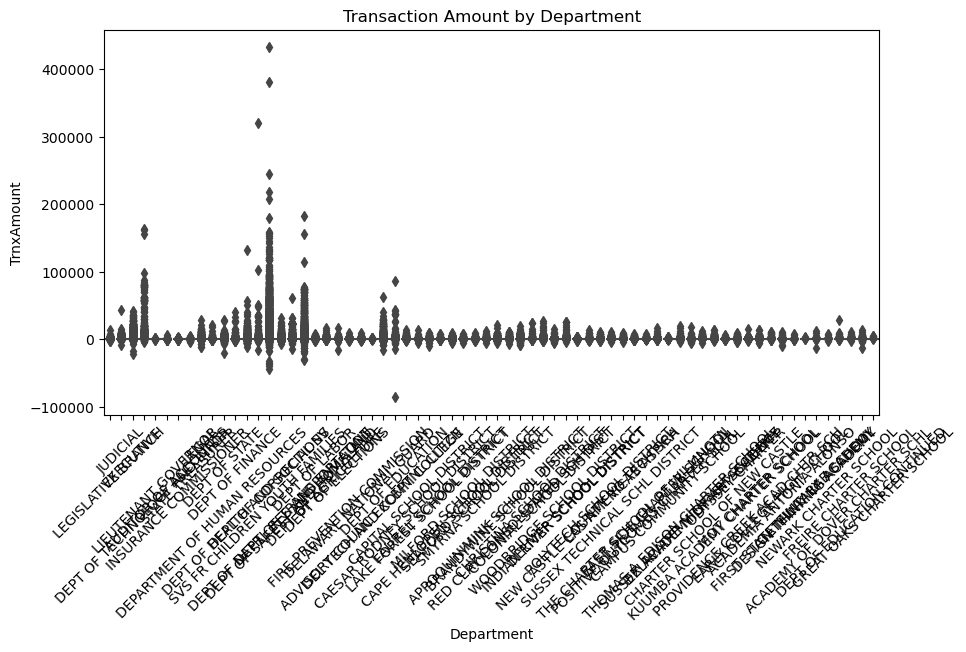

In [23]:
##不同部门的交易金额分布
plt.figure(figsize=(10,5))
sns.boxplot(x='Department', y='TrnxAmount', data=df)
plt.xticks(rotation=45)
plt.title("Transaction Amount by Department")
plt.show()


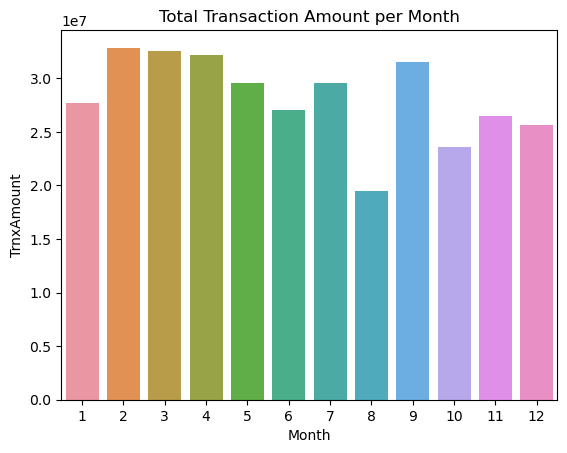

In [24]:
##月份 vs 金额
monthly = df.groupby('Month')['TrnxAmount'].sum().reset_index()
sns.barplot(x='Month', y='TrnxAmount', data=monthly)
plt.title("Total Transaction Amount per Month")
plt.show()
